In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [133]:
# resultsFolder = 'C:\\Users\\tejov\\CivRiseFall_agentmodel2020\\Civ_model_random\\run-model_2-20201007-213729\\run-model_2-20201007-213747\\results'
# path = os.path.abspath(os.getcwd())
# DataFrame = pd.read_csv(resultsFolder + '/results0-tc_a50_k50.csv')
DataFrame = pd.read_csv('C:\\Users\\tejov\\CivRiseFall_agentmodel2020\\Civ_model_smallworld' \
                                '\\smallworld_k6slope10_vil5pref6_8e6_1\\results\\results0-tc_a50_k50.csv')

plt.rcParams['figure.figsize'] = [12, 8]
ax1 = DataFrame.tc.plot()
ax1.set_ylim(0, 1.1)
ax1.set_xlim(-0.1e6,8.1e6)
ax1.set_ylabel('t c', color='tab:blue')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.plot(DataFrame.k_50, color='tab:orange')
ax2.set_ylim(0, 0.2)
ax2.set_ylabel('k_50', color='tab:orange')

Text(0,0.5,'k_50')

In [149]:
%matplotlib qt
# %matplotlib inline
# plt.rcParams['figure.figsize'] = [12, 8]


high_civ = 0.9
low_civ = 0.4

cross_record = []
cycle_count = 0
rise_times = []
fall_times = []
high_times = []
low_times = []

DataFrame = pd.read_csv('C:\\Users\\tejov\\CivRiseFall_agentmodel2020\\Civ_model_random' \
                                '\\random_k6slope10_8e6_1\\results\\results0-tc_a50_k50.csv')
connections = list(DataFrame.tc)

# rf = 0  # falling is 0, rising is 1
# cs = 0  # low_civ is 0, high-civ is 1
recent_cross = [0, 1]  # iteration at which a threshold was most recently crossed, and whether it was the high/falling(0) or low/rising(1)

# loop through connection history and classify
for i in range(1,len(connections)):                                       
    
    if (connections[i] <= high_civ) & (connections[i-1] > high_civ):           # if falls below high_civ
        recent_cross = [i,0]
    if (connections[i] >= low_civ) & (connections[i-1] < low_civ):             # if rises above low_civ 
        recent_cross = [i,1]
        
    if (connections[i] >= high_civ) & (connections[i-1] < high_civ):           # if rises into high_civ
        if recent_cross[1] == 1:                                             # if it rose from low_civ
            cross_record.append([recent_cross[1],recent_cross[0],i])           # add rise to history 
        recent_cross = [i,0]
    if (connections[i] <= low_civ) & (connections[i-1] > low_civ):             # if falls into low_civ 
        if recent_cross[1] == 0:                                             # if it fell from high_civ
            cross_record.append([recent_cross[1],recent_cross[0],i])           # add fall to history 
        recent_cross = [i,1]
cross_record.append([-1,len(connections)-1,-1])  ## append for ending

# plt.rcParams['figure.figsize'] = [12, 8]
# ax1 = DataFrame.tc.plot()
# ax1.set_ylim(0, 1.1)
# ax1.set_xlim(0,2e6)
# ax1.set_ylabel('t c', color='tab:blue')
plt.axis([-.1e6,8.1e6,0,1.1])
for n in range(len(cross_record)-1):
    cur = cross_record[n]
    nxt = cross_record[n+1][1]
    if cur[0] == 1:
        plt.plot(np.arange(cur[1],cur[2]+1,1),connections[cur[1]:cur[2]+1],color = 'tab:green')
        plt.plot(np.arange(cur[2],nxt+1,1),connections[cur[2]:nxt+1],color = 'tab:blue')
        
        rise_times.append(cur[2] - cur[1])
        high_times.append(nxt - cur[2])
        cycle_count += 1
    if cur[0] == 0:
        plt.plot(np.arange(cur[1],cur[2]+1,1),connections[cur[1]:cur[2]+1],color = 'tab:orange')
        plt.plot(np.arange(cur[2],nxt+1,1),connections[cur[2]:nxt+1],color = 'tab:red')
        
        fall_times.append(cur[2] - cur[1])
        low_times.append(nxt - cur[2])


plt.axhline(y=0.9, color = 'black')
plt.axhline(y=0.4, color = 'black')
plt.show()


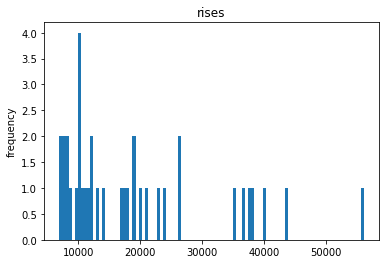

In [136]:
 %matplotlib inline

plt.hist(rise_times, bins=100)
plt.gca().set(title='rises', ylabel='frequency');
plt.show()

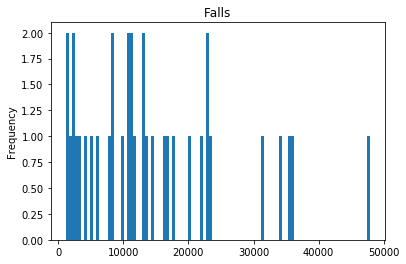

In [137]:
plt.hist(fall_times, bins=100)
plt.gca().set(title='Falls', ylabel='Frequency');
plt.show()


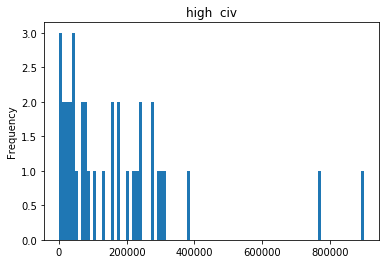

In [138]:
plt.hist(high_times, bins=100)
plt.gca().set(title='high  civ', ylabel='Frequency');
plt.show()

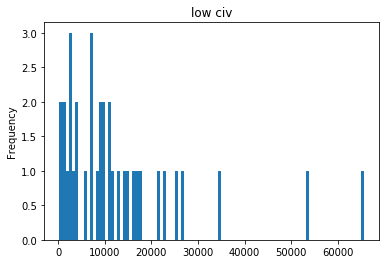

In [139]:
plt.hist(low_times, bins=100)
plt.gca().set(title='low civ', ylabel='Frequency');
plt.show()

In [142]:
%matplotlib qt

fig, axs = plt.subplots(2, 2, sharex=False, sharey=False)
fig.suptitle('smallworld network: tribalPref=0.6, vilSize=5', fontsize=16)
fig.subplots_adjust(wspace=0.35, hspace=0.5)
# kwargs = dict(alpha=0.5, bins=20)
bins_rf=np.histogram(np.hstack((rise_times,fall_times,low_times)), bins=40)[1] #get the bin edges
bins_civ=np.histogram(np.hstack((high_times,low_times)), bins=40)[1] #get the bin edges
max_rfl = max([max(rise_times),max(low_times),max(fall_times)])

axs[0,0].set_xlim(0,max_rfl+0.1*max_rfl)
axs[0,0].hist(rise_times, bins_rf, alpha=0.5, color='g', label='rise')
axs[0,0].legend();
axs[0,0].set_xlabel('duration (interations)');

axs[1,0].set_xlim(0,max_rfl+0.1*max_rfl)
axs[1,0].hist(fall_times, bins_rf, alpha=0.5, color='b', label='fall')
axs[1,0].legend();
axs[1,0].set_xlabel('duration (interations)');


axs[0,1].set_xlim(0,1.1*max(high_times))
axs[0,1].hist(high_times, bins = 80, color='r', label='high civ')
axs[0,1].legend();
axs[0,1].set_xlabel('duration (interations, note larger domain)');


axs[1,1].set_xlim(0,max_rfl+0.1*max_rfl)
axs[1,1].hist(low_times, bins_rf, color='y', label='low civ')
axs[1,1].legend();
axs[1,1].set_xlabel('duration (interations)');

# plt.gca().set(title='Random network', ylabel='Frequency')

# ax1 = axs[1,1].twiny()
# axs[1,1].set_xlim(0,25000)
# axs[1,1].hist(low_times, bins=80, color='orange', label='low civ_zoom')
# # plt.gca().set(title='Random network', ylabel='Frequency')
# axs[1,1].legend();


In [144]:
# % matplotlib inline
% matplotlib qt

rf_ratio = []

for i in range(len(fall_times)-1):
#     print(i)
    rf_ratio.append(rise_times[i+1] / fall_times[i])

plt.xticks(np.arange(0, max(rf_ratio)+1, 0.5))
plt.hist(rf_ratio, bins = 300)
plt.title('distribution of rise and fall time ratios for fall-(low)-rise pairs')
plt.xlabel('rise_time / fall_time')
plt.ylabel('frequency')
# plt.xlim([0,20])
plt.show()

In [148]:
len(rise_times)

37

In [147]:
len(fall_times)

36

In [68]:
print(rise_times[0+1])
print(fall_times[0])

12360
2919


In [145]:
cycle_count

37

In [146]:
len(rise_times)

37

In [119]:
max(high_times)

435137

In [120]:
max(low_times)

41917

In [127]:
max(rf_ratio)

17.795640326975477

In [141]:
max([max(rise_times),max(low_times),max(fall_times)])

65542

In [150]:
plt.title('random: k*=.6 slope=1.0 death=2e-5 iters=8e6 _run1')

Text(0.5,1,'random: k*=.6 slope=1.0 death=2e-5 iters=8e6 _run1')